In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score, KFold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score
from sklearn.svm import SVC


## 0. Data processing and visualization
Load abalone.csv dataset, perform exploratory analysis on the dataset. Clean the data NA-s and from uninformative columns if any.

In [2]:
abalone = pd.read_csv('abalone.csv')
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


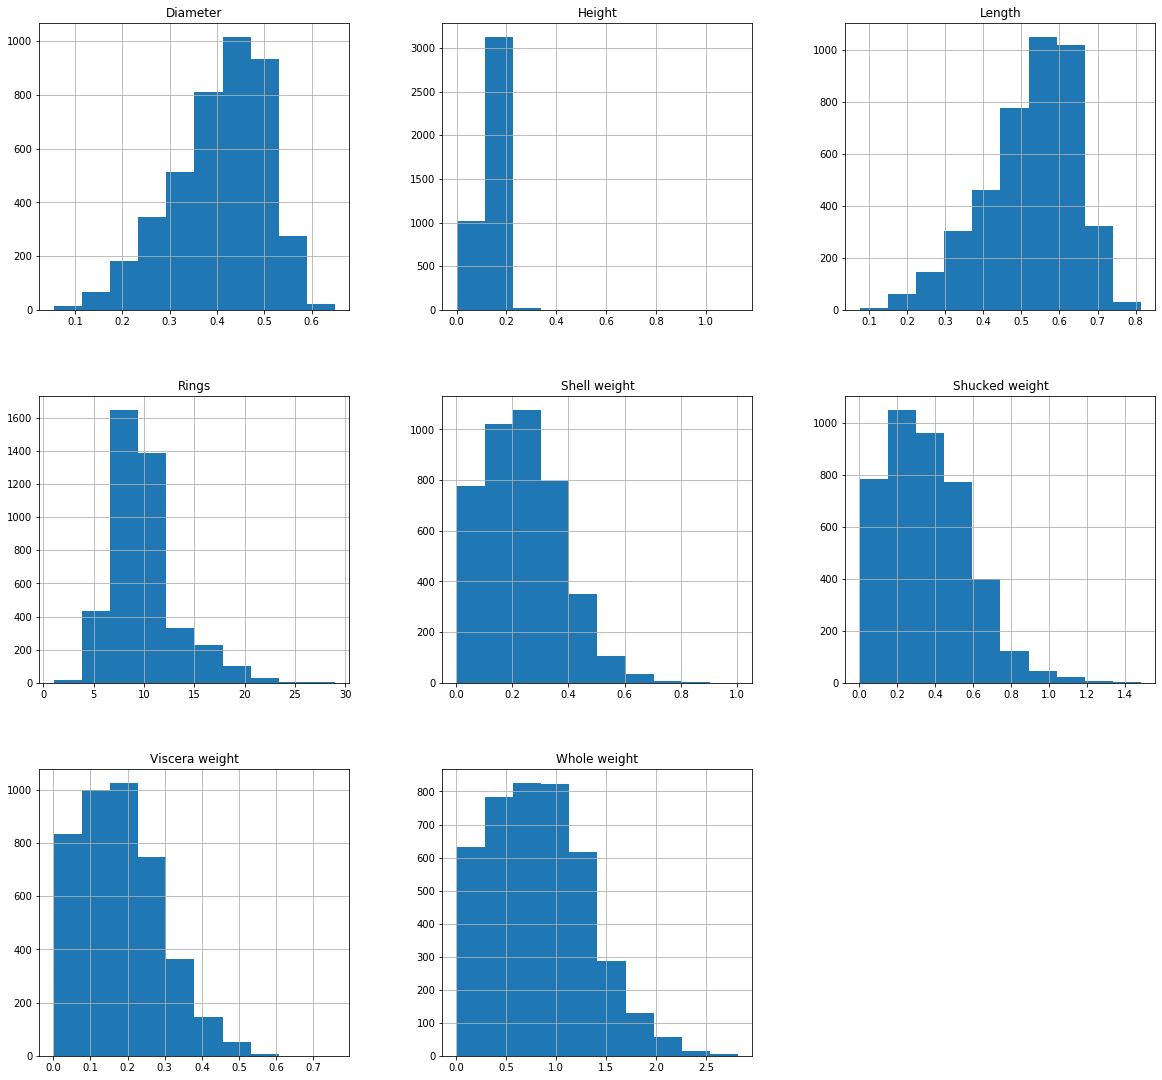

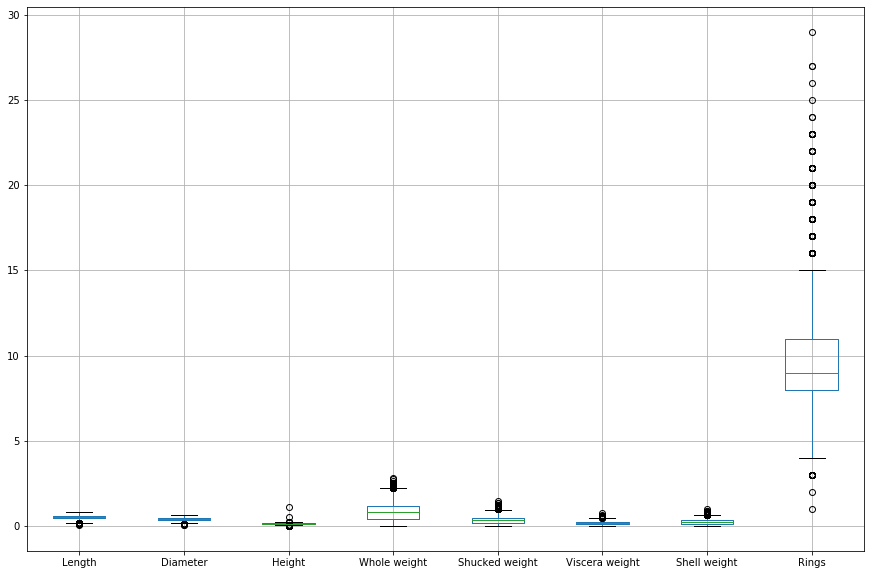

In [3]:
abalone[abalone.columns[1:]].hist(figsize=(20,19))
plt.show()

boxplot = abalone.boxplot(column = list(abalone.columns[1:]),figsize=(15,10))

In [4]:
abalone.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [5]:
abalone.drop('Height',axis=1,inplace=True)
abalone.head()

,Sex,Length,Diameter,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.2050,0.0895,0.0395,0.055,7


## 1. Fitting SVM
In this task we will try to predict the gender of an abalone snail. In the dataset we have three classes: "M" - male, "F"-female, "I" - infant.
1. Change the target variable from categorical to numeric.
2. Perform train/test split with ratio 85/15.
3. Reduce the training set to 2 dimensions and make a scatter plot, by coloring the points according to target variable. What do you think can SVM with linear kernel get good results?
4. Choose the best parameters for SVM and fit a model with that best params, report the accuracy and f1-score on the test set.

In [6]:
#1.Change the target variable from categorical to numeric.
abalone = abalone.replace({'M':1,'F':0,'I':2})


In [7]:
#2.Perform train/test split with ratio 85/15.
target = abalone['Sex']
data = abalone.drop('Sex',axis=1)
xtrain ,xtest,ytrain,ytest = train_test_split(data,target,test_size=0.15,random_state=45)
xtrain.shape,xtest.shape

((3550, 7), (627, 7))

In [8]:
st = StandardScaler()
xtrain_st=st.fit_transform(xtrain)
xtest_st = st.transform(xtest)


(3550, 2)


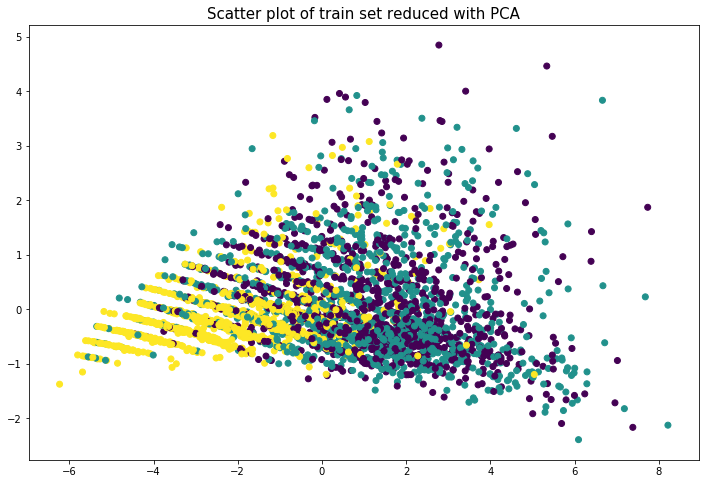

In [9]:
#3.Reduce the training set to 2 dimensions and make a scatter plot,by coloring the points according to target variable
pca = PCA(n_components=0.94)
pca1 = pca.fit_transform(xtrain_st)

print(pca1.shape)

fig = plt.figure(figsize = (12,8))
plt.scatter(pca1[:,0],pca1[:,1],c=ytrain)
plt.title('Scatter plot of train set reduced with PCA',fontsize=15)
plt.show()

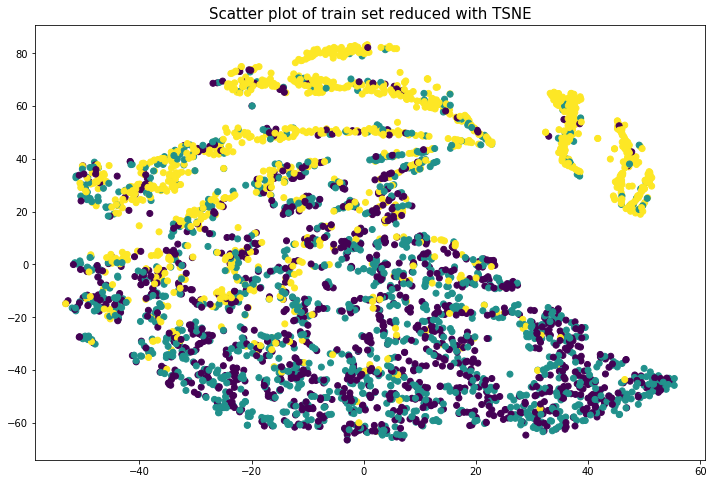

Wall time: 31.7 s


In [10]:
%%time
tsne = TSNE(n_components=2)
tsne1 = tsne.fit_transform(xtrain_st)

fig = plt.figure(figsize = (12,8))
plt.scatter(tsne1[:,0],tsne1[:,1],c=ytrain)
plt.title('Scatter plot of train set reduced with TSNE',fontsize=15)
plt.show()

(3550, 2)


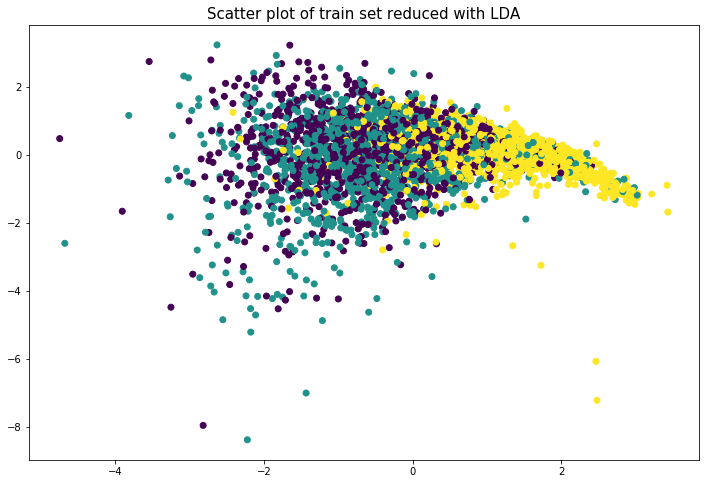

In [11]:
lda = LDA()
lda1 = lda.fit_transform(xtrain_st,ytrain)
print(lda1.shape)

fig = plt.figure(figsize = (12,8))
plt.scatter(lda1[:,0],lda1[:,1],c=ytrain)
plt.title('Scatter plot of train set reduced with LDA',fontsize=15)
plt.show()

In [12]:
%%time
#4Choose the best parameters for SVM and fit a model with that best params, report the accuracy and f1-score on the test set.
param_grid = {'C': [0.1,1, 10, 100,1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['linear','rbf','sigmoid']}

grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3,cv=4)
grid.fit(xtrain_st,ytrain)


Fitting 4 folds for each of 75 candidates, totalling 300 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.538, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.570, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.542, total=   0.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.557, total=   0.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.521, total=   0.3s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.563, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.546, total=   0.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.555, total=   0.4s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] ...... C=0.1, gamma=1, kernel=sigmoid, score=0.452, total=   0.6s
[CV] C=0.1, gamma=1, kernel=sigmoid ..................................
[CV] .

[CV] ......... C=1, gamma=1, kernel=linear, score=0.533, total=   0.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.573, total=   0.3s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.545, total=   0.4s
[CV] C=1, gamma=1, kernel=linear .....................................
[CV] ......... C=1, gamma=1, kernel=linear, score=0.565, total=   0.3s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.541, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.573, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] ............ C=1, gamma=1, kernel=rbf, score=0.549, total=   0.4s
[CV] C=1, gamma=1, kernel=rbf ........................................
[CV] .

[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.512, total=   1.1s
[CV] C=1, gamma=0.0001, kernel=sigmoid ...............................
[CV] ... C=1, gamma=0.0001, kernel=sigmoid, score=0.519, total=   1.1s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.534, total=   0.8s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.572, total=   0.8s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.546, total=   0.8s
[CV] C=10, gamma=1, kernel=linear ....................................
[CV] ........ C=10, gamma=1, kernel=linear, score=0.560, total=   0.8s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.542, total=   0.5s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.519, total=   0.9s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.556, total=   0.9s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.525, total=   0.9s
[CV] C=10, gamma=0.0001, kernel=sigmoid ..............................
[CV] .. C=10, gamma=0.0001, kernel=sigmoid, score=0.548, total=   0.9s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.532, total=   3.5s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.572, total=   3.4s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] ....... C=100, gamma=1, kernel=linear, score=0.545, total=   9.6s
[CV] C=100, gamma=1, kernel=linear ...................................
[CV] .

[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.536, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=100, gamma=0.0001, kernel=rbf, score=0.556, total=   0.3s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.528, total=   0.9s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.571, total=   0.9s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.534, total=   0.9s
[CV] C=100, gamma=0.0001, kernel=sigmoid .............................
[CV] . C=100, gamma=0.0001, kernel=sigmoid, score=0.551, total=   0.9s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] ...... C=1000, gamma=1, kernel=linear, score=0.530, total=  23.6s
[CV] C=1000, gamma=1, kernel=linear ..................................
[CV] .

[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.539, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.577, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.541, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] .... C=1000, gamma=0.0001, kernel=rbf, score=0.564, total=   0.4s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.538, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.570, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  C=1000, gamma=0.0001, kernel=sigmoid, score=0.542, total=   0.9s
[CV] C=1000, gamma=0.0001, kernel=sigmoid ............................
[CV]  

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 13.4min finished


Wall time: 13min 24s


GridSearchCV(cv=4, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [13]:
print("The best test score is %s corresponding to hyperparameters %s" %(grid.best_score_,grid.best_params_))

The best test score is 0.5684524716373646 corresponding to hyperparameters {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}


In [14]:
grid1 = SVC(C=100,gamma =0.1,kernel='rbf')
grid1.fit(xtrain_st,ytrain)
predicted = grid1.predict(xtest_st)

print('The Accuracy score is %s' % accuracy_score(predicted,ytest))

average = {None:'If "None", the scores for each class are returned.',
           'micro':'If "micro",Calculate metrics globally by counting the total true positives,false negatives and false positives.',
           'macro':'If "macro",Calculate metrics for each label, and find their unweightedmean. This does not take label imbalance into account.',
           'weighted':'If "weighted",Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)'}
for i in average:
    print('\nThe f1_score is %s when average = %s' % (f1_score(predicted,ytest,average=i),i),"\n",average[i])

The Accuracy score is 0.5598086124401914

The f1_score is [0.34551495 0.52589641 0.7405765 ] when average = None 
 If "None", the scores for each class are returned.

The f1_score is 0.5598086124401914 when average = micro 
 If "micro",Calculate metrics globally by counting the total true positives,false negatives and false positives.

The f1_score is 0.5373292870609334 when average = macro 
 If "macro",Calculate metrics for each label, and find their unweightedmean. This does not take label imbalance into account.

The f1_score is 0.581862490535095 when average = weighted 
 If "weighted",Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)


## 2. Fitting Logistic Regression
Here again we will try to predict the same target variable as in the previous task. Use the same train and test sets as in the previous task.
1. Choose the best parameters for logistic regression model and report the accuracy and f1-score on the test set.
2. You know that logistic regression performs better on smaller number of dimensions. Try to reduce the number of dimensions in the dataset and again fit choose the best parameters for the logistic regression model and report the accuracy and f1-score on the test set.
3. Write a short paragraph comparing the results you got in task 1 and task 2, what do you think why you got that results?

In [15]:
%%time
param_grid_log = {'C': [0.01,0.1,1, 10, 100, 1000],'max_iter':[100,1000,10000] ,
                  'multi_class':['ovr','multinomial'],'l1_ratio':[0,0.25,0.5,0.75,1]}
grid_log = GridSearchCV(LogisticRegression(penalty='elasticnet',solver='saga'),param_grid_log,refit=True,verbose=3,cv=5)
grid_log.fit(xtrain_st,ytrain)

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr ...............
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.524, total=   0.1s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr ...............
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.580, total=   0.0s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr ...............
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.538, total=   0.0s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.549, total=   0.1s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr ...............
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.561, total=   0.0s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial .......
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.521, total=   0.0s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial .......
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.576, total=   0.0s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial .......
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.552, total=   0.0s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial .......
[CV]  C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.570, total=   0.0s
[CV] C=0.01, l1_ratio=0, max_iter=100, multi_class=multinomial .......
[CV]  C=0.01, l1_ratio=0, max_iter=100

[CV]  C=0.01, l1_ratio=0.25, max_iter=10000, multi_class=multinomial, score=0.558, total=   0.0s
[CV] C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr .............
[CV]  C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.520, total=   0.0s
[CV] C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr .............
[CV]  C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.570, total=   0.0s
[CV] C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr .............
[CV]  C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.538, total=   0.0s
[CV] C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr .............
[CV]  C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.542, total=   0.0s
[CV] C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr .............
[CV]  C=0.01, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.561, total=   0.0s
[CV] C=0.01, l1_ratio=0.5, max_iter=100, multi_class=multinomial .....
[CV]  C=0.01, l1_ratio=0.5, max_iter=100, multi

[CV]  C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.539, total=   0.0s
[CV] C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=ovr ..........
[CV]  C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.539, total=   0.1s
[CV] C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=ovr ..........
[CV]  C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.566, total=   0.0s
[CV] C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=multinomial ..
[CV]  C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=multinomial, score=0.528, total=   0.0s
[CV] C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=multinomial ..
[CV]  C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=multinomial, score=0.546, total=   0.0s
[CV] C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=multinomial ..
[CV]  C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=multinomial, score=0.544, total=   0.0s
[CV] C=0.01, l1_ratio=0.75, max_iter=10000, multi_class=multinomial ..
[CV]  C=0.01, l1

[CV]  C=0.1, l1_ratio=0, max_iter=1000, multi_class=multinomial, score=0.558, total=   0.1s
[CV] C=0.1, l1_ratio=0, max_iter=1000, multi_class=multinomial .......
[CV]  C=0.1, l1_ratio=0, max_iter=1000, multi_class=multinomial, score=0.573, total=   0.1s
[CV] C=0.1, l1_ratio=0, max_iter=1000, multi_class=multinomial .......
[CV]  C=0.1, l1_ratio=0, max_iter=1000, multi_class=multinomial, score=0.548, total=   0.1s
[CV] C=0.1, l1_ratio=0, max_iter=10000, multi_class=ovr ..............
[CV]  C=0.1, l1_ratio=0, max_iter=10000, multi_class=ovr, score=0.541, total=   0.1s
[CV] C=0.1, l1_ratio=0, max_iter=10000, multi_class=ovr ..............
[CV]  C=0.1, l1_ratio=0, max_iter=10000, multi_class=ovr, score=0.568, total=   0.1s
[CV] C=0.1, l1_ratio=0, max_iter=10000, multi_class=ovr ..............
[CV]  C=0.1, l1_ratio=0, max_iter=10000, multi_class=ovr, score=0.549, total=   0.0s
[CV] C=0.1, l1_ratio=0, max_iter=10000, multi_class=ovr ..............
[CV]  C=0.1, l1_ratio=0, max_iter=10000, mu

[CV]  C=0.1, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=0.1, l1_ratio=0.5, max_iter=100, multi_class=multinomial ......
[CV]  C=0.1, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.542, total=   0.1s
[CV] C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.546, total=   0.1s
[CV] C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.563, total=   0.1s
[CV] C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.546, total=   0.1s
[CV] C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.562, total=   0.1s
[CV] C=0.1, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=0.1, l1_ratio=0.5, max_iter=1000, mu

[CV]  C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.544, total=   0.1s
[CV] C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr ................
[CV]  C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.563, total=   0.0s
[CV] C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr ................
[CV]  C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.552, total=   0.1s
[CV] C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr ................
[CV]  C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.575, total=   0.0s
[CV] C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr ................
[CV]  C=0.1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.555, total=   0.1s
[CV] C=0.1, l1_ratio=1, max_iter=100, multi_class=multinomial ........
[CV]  C=0.1, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.539, total=   0.0s
[CV] C=0.1, l1_ratio=1, max_iter=100, multi_class=multinomial ........
[CV]  C=0.1, l1_ratio=1, max_iter=100, multi_class=multinomial, scor

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.568, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=ovr ..................
[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=ovr ..................


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.562, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=ovr ..................
[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.545, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=multinomial ..........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.549, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=multinomial ..........
[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.565, total=   0.2s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=multinomial ..........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.551, total=   0.2s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=multinomial ..........
[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.579, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=100, multi_class=multinomial ..........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.545, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.548, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.568, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=1, l1_ratio=0, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.545, total=   0.1s
[CV] C=1, l1_ratio=0, max_iter=1000, multi_class=multinomial .........
[CV]  C=1, l1_ratio=0, max_iter=1000, multi_class=multinomial, score=0.549,

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.568, total=   0.1s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=ovr ...............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.563, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.545, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.548, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial .......
[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.566, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.552, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.577, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial .......
[CV]  C=1, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.546, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.563, total=   0.2s
[CV] C=1, l1_ratio=0.25, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.25, max_iter=1000, multi_cla

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.568, total=   0.1s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=ovr ................
[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=ovr ................


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.565, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=ovr ................
[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.544, total=   0.1s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.546, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.568, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.552, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial ........
[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.576, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.546, total=   0.1s
[CV] C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.565, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.544, total=   0.2s
[CV] C=1, l1_ratio=0.5, max_iter=1000, multi_class=multinomial .......
[CV]  C=1, l1_ratio=0.5, max_iter=1000, multi_class=multinomial

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.568, total=   0.1s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.549, total=   0.1s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.565, total=   0.1s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=ovr ...............
[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.542, total=   0.1s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.546, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.568, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial .......
[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.552, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.577, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial .......
[CV]  C=1, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.546, total=   0.1s
[CV] C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.565, total=   0.2s
[CV] C=1, l1_ratio=0.75, max_iter=1000, multi_class=ovr ..............
[CV]  C=1, l1_ratio=0.75, max_iter=1000, multi_cla

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.566, total=   0.1s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=ovr ..................
[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.549, total=   0.1s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=ovr ..................
[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.562, total=   0.1s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=ovr ..................
[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.541, total=   0.1s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=multinomial ..........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=multinomial ..........
[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.568, total=   0.2s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=multinomial ..........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.552, total=   0.2s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=multinomial ..........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.582, total=   0.2s
[CV] C=1, l1_ratio=1, max_iter=100, multi_class=multinomial ..........
[CV]  C=1, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1, l1_ratio=1, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.546, total=   0.1s
[CV] C=1, l1_ratio=1, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=1, l1_ratio=1, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.549, total=   0.1s
[CV] C=1, l1_ratio=1, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=1, l1_ratio=1, max_iter=1000, multi_class=ovr .................
[CV]  C=1, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.541, 

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.568, total=   0.1s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=ovr .................
[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=ovr .................


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=ovr .................


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=multinomial .........
[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=multinomial .........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=multinomial .........
[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=multinomial .........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.580, total=   0.1s
[CV] C=10, l1_ratio=0, max_iter=100, multi_class=multinomial .........
[CV]  C=10, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=10, l1_ratio=0, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=10, l1_ratio=0, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=0, max_iter=1000, multi_class=ovr, score=

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=ovr ..............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=ovr ..............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial ......
[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial ......
[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial ......

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial ......
[CV]  C=10, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.568, total=   0.3s
[CV] C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.551, total=   0.3s
[CV] C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=10, l1_ratio=0.25, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.25, max_iter=1000, m

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.555, total=   0.2s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr ...............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.568, total=   0.4s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr ...............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.552, total=   0.3s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr ...............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr ...............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.570, total=   0.3s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.580, total=   0.3s
[CV] C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.568, total=   0.4s
[CV] C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.552, total=   0.3s
[CV] C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.562, total=   0.4s
[CV] C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.542, total=   0.6s
[CV] C=10, l1_ratio=0.5, max_iter=1000, multi_class=multinomial ......
[CV]  C=10, l1_ratio=0.5, max_iter=1000, multi_class=mult

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.555, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr ..............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.552, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr ..............
[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.563, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr ..............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial ......
[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.572, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.568, total=   0.3s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.562, total=   0.4s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr .............
[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.542, total=   0.3s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial, score=0.554, total=   1.9s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial, score=0.572, total=   1.8s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial, score=0.549, total=   1.8s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial, score=0.580, total=   1.8s
[CV] C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=0.75, max_iter=1000, multi_class=multinomial, score=0.545, total=   2.0s
[CV] C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr ............
[CV]  C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr ............
[CV]  C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.568, total=   0.3s
[CV] C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr ............
[CV]  C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr ............
[CV]  C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.563, total=   0.3s
[CV] C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr ............
[CV]  C=10, l1_ratio=0.75, max_iter=10000, multi_class=ovr, score=0.542, total=   0.3s
[CV] C=10, l1_ratio=0.75, max_iter=10000, multi_class=multinomial ....
[CV]  C=10, l1_ratio=0.75, max_iter=10000, mu

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=ovr .................
[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.552, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=ovr .................


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.563, total=   0.1s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=ovr .................
[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.544, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=multinomial .........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=multinomial .........
[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.572, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=multinomial .........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=multinomial .........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.579, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=100, multi_class=multinomial .........
[CV]  C=10, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.568, total=   0.4s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.563, total=   0.3s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=ovr ................
[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=ovr, score=

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial, score=0.554, total=   1.6s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial, score=0.572, total=   1.6s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial, score=0.549, total=   1.9s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial ........
[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial, score=0.580, total=   1.5s
[CV] C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=10, l1_ratio=1, max_iter=1000, multi_class=multinomial, score=0.544, total=   1.6s
[CV] C=10, l1_ratio=1, max_iter=10000, multi_class=ovr ...............
[CV]  C=10, l1_ratio=1, max_iter=10000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=10, l1_ratio=1, max_iter=10000, multi_class=ovr ...............
[CV]  C=10, l1_ratio=1, max_iter=10000, multi_class=ovr, score=0.568, total=   0.3s
[CV] C=10, l1_ratio=1, max_iter=10000, multi_class=ovr ...............
[CV]  C=10, l1_ratio=1, max_iter=10000, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=10, l1_ratio=1, max_iter=10000, multi_class=ovr ...............
[CV]  C=10, l1_ratio=1, max_iter=10000, multi_class=ovr, score=0.563, total=   0.3s
[CV] C=10, l1_ratio=1, max_iter=10000, multi_class=ovr ...............
[CV]  C=10, l1_ratio=1, max_iter=10000, multi_class=ovr, score=0.544, total=   0.3s
[CV] C=10, l1_ratio=1, max_iter=10000, multi_class=multinomial .......
[CV]  C=10, l1_ratio=1, max_iter=10000, multi_class=multinomial

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=ovr ................
[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=ovr ................


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=ovr ................
[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.542, total=   0.1s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.554, total=   0.1s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=multinomial ........
[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.570, total=   0.1s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.549, total=   0.1s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=multinomial ........
[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.580, total=   0.1s
[CV] C=100, l1_ratio=0, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=100, l1_ratio=0, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=100, l1_ratio=0, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=100, l1_ratio=0, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.549, total=   0.2s
[CV] C=100, l1_ratio=0, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=100, l1_ratio=0, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.542, total=   0.3s
[CV] C=100, l1_ratio=0, max_iter=1000, multi_class=multinomial .......
[CV]  C=100, l1_ratio=0, max_iter=1000, multi_class=multinomial

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=ovr .............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial .....
[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.566, total=   0.3s
[CV] C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.549, total=   0.3s
[CV] C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.542, total=   0.3s
[CV] C=100, l1_ratio=0.25, max_iter=1000, multi_class=multinomial ....
[CV]  C=100, l1_ratio=0.25, max_iter=1000, mu

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=ovr ..............
[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=ovr ..............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=ovr ..............
[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial ......

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial ......
[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.548, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial ......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.566, total=   0.3s
[CV] C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.549, total=   0.3s
[CV] C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.542, total=   0.4s
[CV] C=100, l1_ratio=0.5, max_iter=1000, multi_class=multinomial .....
[CV]  C=100, l1_ratio=0.5, max_iter=1000, multi_cla

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.568, total=   0.2s
[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=ovr .............
[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.562, total=   0.1s
[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=ovr .............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial .....
[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)



[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial .....
[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial .....
[CV]  C=100, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.566, total=   0.3s
[CV] C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.549, total=   0.3s
[CV] C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=100, l1_ratio=0.75, max_iter=1000, multi_class=ovr ............
[CV]  C=100, l1_ratio=0.75, max_iter=1

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.566, total=   0.1s
[CV] C=100, l1_ratio=1, max_iter=100, multi_class=ovr ................
[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=100, l1_ratio=1, max_iter=100, multi_class=ovr ................


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=100, l1_ratio=1, max_iter=100, multi_class=ovr ................
[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=100, l1_ratio=1, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=100, l1_ratio=1, max_iter=100, multi_class=multinomial ........
[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV] C=100, l1_ratio=1, max_iter=100, multi_class=multinomial ........
[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=100, l1_ratio=1, max_iter=100, multi_class=multinomial ........


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=100, l1_ratio=1, max_iter=100, multi_class=multinomial ........
[CV]  C=100, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=100, l1_ratio=1, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=100, l1_ratio=1, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.568, total=   0.3s
[CV] C=100, l1_ratio=1, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.549, total=   0.3s
[CV] C=100, l1_ratio=1, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=100, l1_ratio=1, max_iter=1000, multi_class=ovr ...............
[CV]  C=100, l1_ratio=1, max_iter=1000, multi_class=ovr,

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.566, total=   0.1s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=ovr ...............
[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=ovr ...............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.562, total=   0.1s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=ovr ...............
[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.554, total=   0.1s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial .......
[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.570, total=   0.1s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial .......
[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.580, total=   0.1s
[CV] C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0, max_iter=100, multi_class=multinomial, score=0.545, total=   0.1s
[CV] C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.554, total=   0.2s
[CV] C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.549, total=   0.2s
[CV] C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=0, max_iter=1000, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=1000, l1_ratio=0, max_iter=1000, multi_class=multinomial ......
[CV]  C=1000, l1_ratio=0, max_iter=1000, multi_class=mult

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=ovr ............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial ....
[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial ....
[CV]  C=1000, l1_ratio=0.25, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.566, total=   0.3s
[CV] C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.549, total=   0.3s
[CV] C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=1000, l1_ratio=0.25, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.25, max

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.566, total=   0.1s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=ovr .............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=ovr .............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=ovr .............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial .....
[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.580, total=   0.4s
[CV] C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial .....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.5, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.554, total=   0.4s
[CV] C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.566, total=   0.3s
[CV] C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.549, total=   0.4s
[CV] C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.5, max_iter=1000, multi_class=ovr, score=0.542, total=   0.4s
[CV] C=1000, l1_ratio=0.5, max_iter=1000, multi_class=multinomial ....
[CV]  C=1000, l1_ratio=0.5, max_iter=1000, mu

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.555, total=   0.2s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr ............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.551, total=   0.2s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr ............
[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.562, total=   0.2s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr ............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.554, total=   0.4s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.580, total=   0.3s
[CV] C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial ....


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=0.75, max_iter=100, multi_class=multinomial, score=0.545, total=   0.4s
[CV] C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.554, total=   0.4s
[CV] C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.566, total=   0.3s
[CV] C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.549, total=   0.3s
[CV] C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr ...........
[CV]  C=1000, l1_ratio=0.75, max_iter=1000, multi_class=ovr, score=0.542, total=   0.3s
[CV] C=1000, l1_ratio=0.75, max_iter=1000, multi_class=multinomial ...
[CV]  C=1000, l1_ratio=0.75, max_iter=1

C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.566, total=   0.2s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=ovr ...............
[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.551, total=   0.1s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=ovr ...............


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.562, total=   0.1s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=ovr ...............
[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=ovr, score=0.542, total=   0.2s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.554, total=   0.2s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.570, total=   0.2s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial .......
[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.549, total=   0.2s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial .......


C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\-Intel-\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.580, total=   0.2s
[CV] C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial .......
[CV]  C=1000, l1_ratio=1, max_iter=100, multi_class=multinomial, score=0.545, total=   0.2s
[CV] C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.554, total=   0.3s
[CV] C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.566, total=   0.3s
[CV] C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.549, total=   0.3s
[CV] C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr, score=0.562, total=   0.3s
[CV] C=1000, l1_ratio=1, max_iter=1000, multi_class=ovr ..............
[CV]  C=1000, l1_ratio=1, max_iter=1000, multi_cla

[Parallel(n_jobs=1)]: Done 900 out of 900 | elapsed:  3.8min finished


Wall time: 3min 50s


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='elasticnet',
                                          random_state=None, solver='saga',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'l1_ratio': [0, 0.25, 0.5, 0.75, 1],
                         'max_iter': [100, 1000, 10000],
                         'multi_class': ['ovr', 'multinomial']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=Non

In [16]:
print("The best test score is %s corresponding to hyperparameters %s" %(grid_log.best_score_,grid_log.best_params_))

The best test score is 0.56 corresponding to hyperparameters {'C': 10, 'l1_ratio': 0, 'max_iter': 1000, 'multi_class': 'multinomial'}


In [17]:
log1 = LogisticRegression(solver='saga',C=10, multi_class='multinomial',max_iter=1000)
log1.fit(xtrain_st,ytrain)
pred = log1.predict(xtest_st)
 
print('The Accuracy score is %s' % accuracy_score(pred,ytest,))

average = {None:'If "None", the scores for each class are returned.',
           'micro':'If "micro",Calculate metrics globally by counting the total true positives,false negatives and false positives.',
           'macro':'If "macro",Calculate metrics for each label, and find their unweightedmean.  This does not take label imbalance into account.',
           'weighted':'If "weighted",Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)'}
for i in average:
    print('\nThe f1_score is %s when average = %s' % (f1_score(pred,ytest,average=i),i),"\n",average[i])

The Accuracy score is 0.543859649122807

The f1_score is [0.39009288 0.48275862 0.71092077] when average = None 
 If "None", the scores for each class are returned.

The f1_score is 0.543859649122807 when average = micro 
 If "micro",Calculate metrics globally by counting the total true positives,false negatives and false positives.

The f1_score is 0.5279240902748552 when average = macro 
 If "macro",Calculate metrics for each label, and find their unweightedmean.  This does not take label imbalance into account.

The f1_score is 0.5610806530197968 when average = weighted 
 If "weighted",Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label)
